# seaborn

## importing libaries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pd
import seaborn as sns

In [6]:
df=sns.load_dataset("titanic")

In [7]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 5 point statistical summary for numerical variables

In [9]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### summary for categorical variables

In [11]:
df.describe(exclude="number")

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


## missing values treatment

In [13]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
df.shape

(891, 15)

####  Since, deck column has more number of missing values, we are dropping deck column

In [16]:
df.drop("deck",axis=1,inplace=True)

#### embark_town column has only 2 missing values among 891 rows, so we are dropping the null records alone

In [18]:
df.dropna(subset = "embark_town", inplace=True)

In [19]:
df.isnull().sum()/df.shape[0]*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.910011
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.000000
class           0.000000
who             0.000000
adult_male      0.000000
embark_town     0.000000
alive           0.000000
alone           0.000000
dtype: float64

#### 19% of the data is null in age, so we are filling it 

In [21]:
df['age'].fillna(df['age'].mean(),inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_2136\1492264711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


In [22]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

#### so, we treated all the null values, now we can proceed with further analysis

In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


## univariate analysis

### numerical column

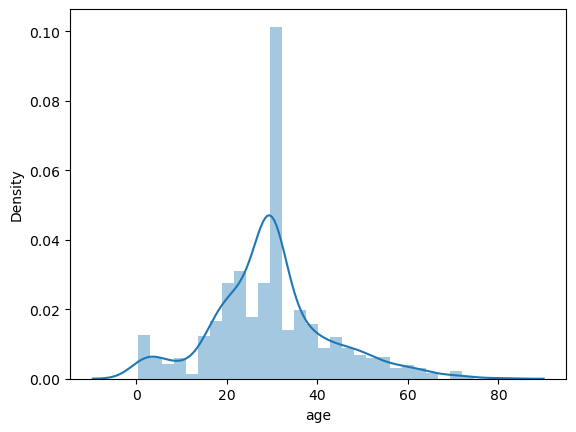

In [178]:
sns.distplot(df["age"])
plt.show()

In [182]:
df.age.skew()

0.4343546516140875

### Insights:
- age is right skewed.
- majority age group belongs to 20 - 40
- there are less old people

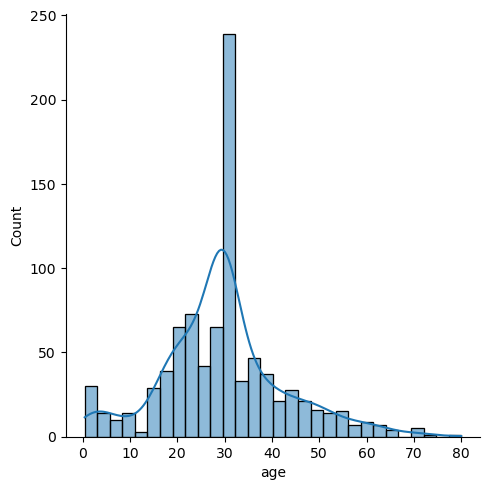

In [28]:
sns.displot(df['age'],kde=True)

In [29]:
df['age'].skew()

0.4343546516140875

#### age column is normally distributed

## categorical column

<Axes: xlabel='sex', ylabel='count'>

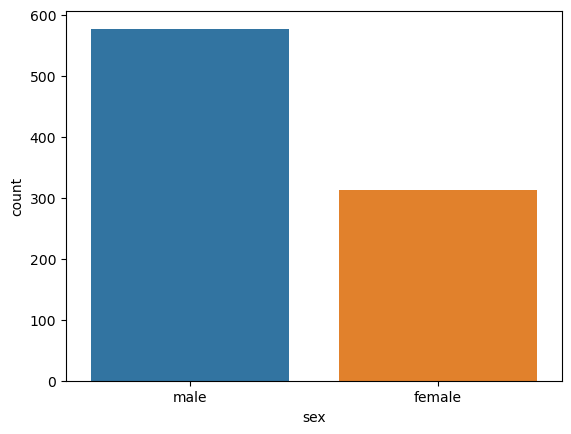

In [32]:
sns.countplot(x = df['sex'], hue = df.sex) #palette = ["yellow","red"]

### insights
* there are more males approx to 600 people
* there are less female approx to 300 people
* male strength is higher than female.

# box plot 
* #### used for outliers detection

<Axes: ylabel='age'>

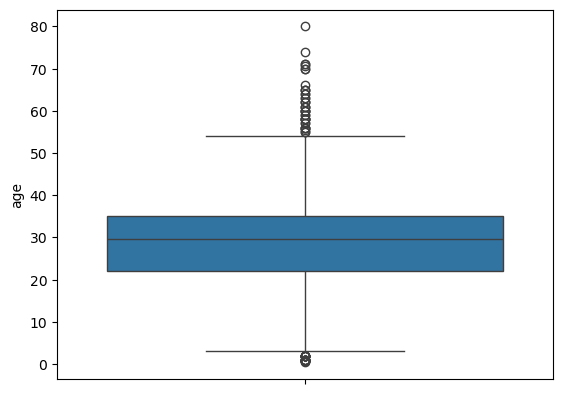

In [115]:
sns.boxplot(df['age'])

# insights 
* the age column shows many outliers
* the graph shows the median age 30
* there are many outliers in the range of 55 to 80

<Axes: >

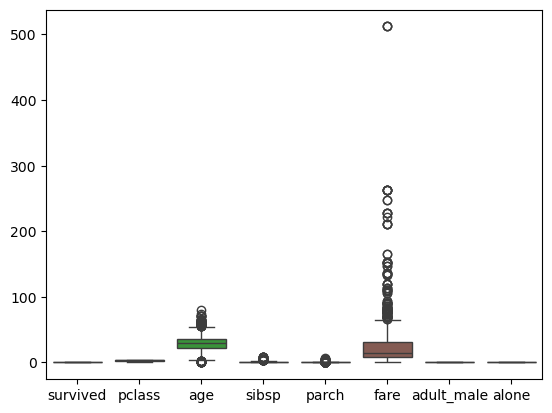

In [117]:
sns.boxplot(df)

# bi variate analysis

## 1 categorical vs 1 numerical

<Axes: xlabel='sex', ylabel='age'>

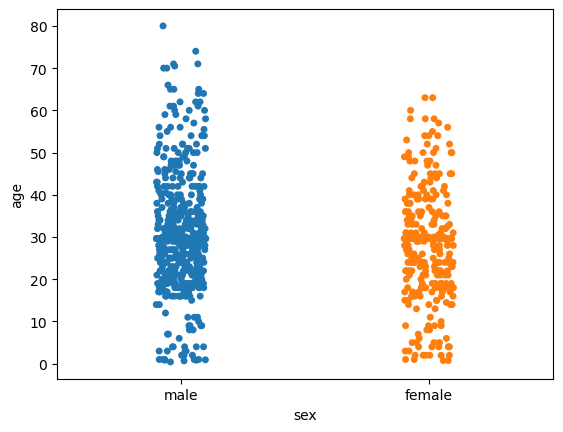

In [36]:
sns.stripplot(x=df["sex"],y=df['age'],hue=df.sex)

## 2 categorical vs 1 numerical

<Axes: xlabel='sex', ylabel='age'>

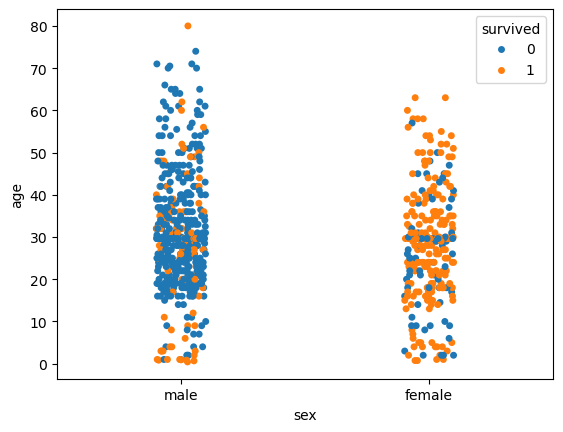

In [38]:
sns.stripplot(x=df['sex'],y=df['age'],hue=df.survived)

# violen plot 
* #### similar to box plot

<Axes: xlabel='sex', ylabel='age'>

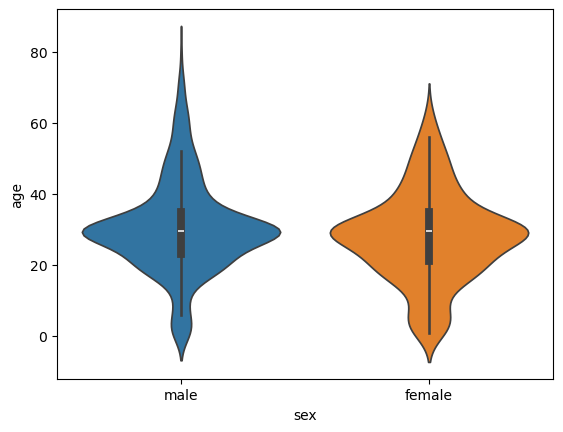

In [79]:
sns.violinplot(x=df['sex'],y=df['age'], hue=df.sex)

<Axes: xlabel='sex', ylabel='age'>

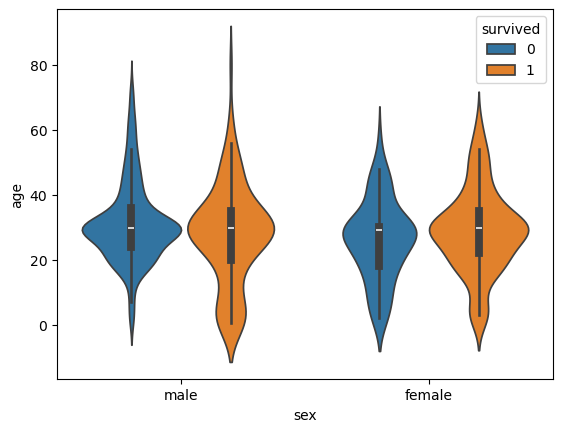

In [83]:
sns.violinplot(x=df['sex'],y=df['age'], hue=df.survived)

<Axes: xlabel='sex', ylabel='age'>

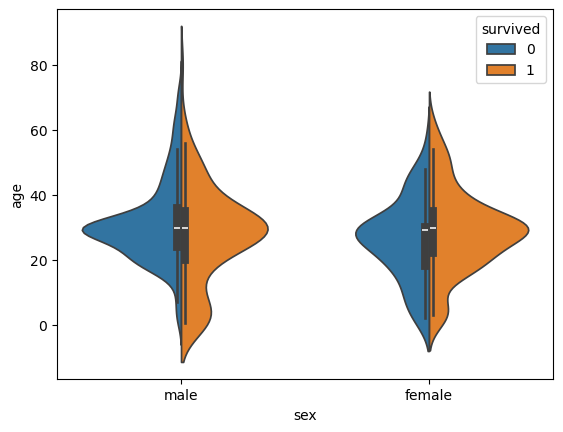

In [85]:
sns.violinplot(x=df['sex'],y=df['age'], hue=df.survived, split=True)

# swarm plot

In [100]:
import warnings
warnings.filterwarnings('ignore')

* similar to stip plot, the datapoints do not overlap like stripplot

<Axes: xlabel='sex', ylabel='age'>

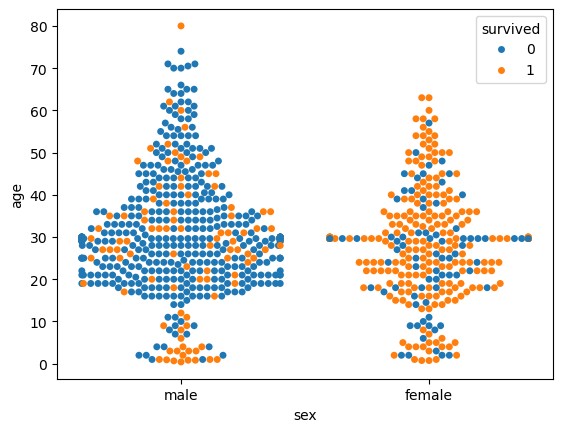

In [106]:
sns.swarmplot(x = df['sex'],y = df['age'],hue=df.survived)

In [119]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,Southampton,no,False


<Axes: xlabel='age', ylabel='fare'>

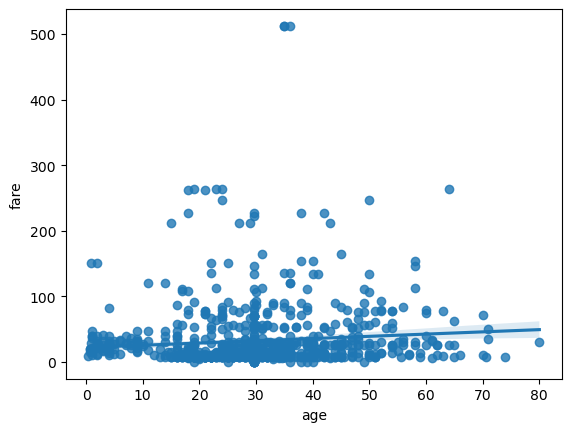

In [121]:
sns.regplot(x=df['age'],y=df['fare'])

# joint plott

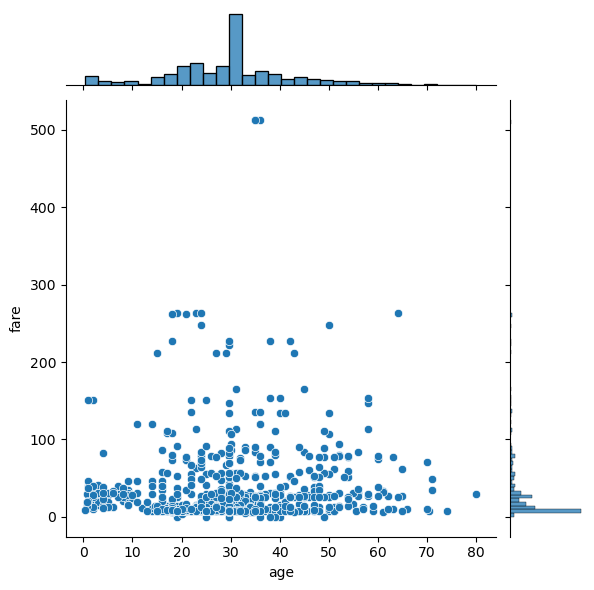

In [124]:
sns.jointplot(x=df['age'],y=df['fare'])

In [130]:
df.select_dtypes(include="number")

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.642093,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [132]:
df.select_dtypes(exclude="number")

,sex,embarked,class,who,adult_male,embark_town,alive,alone
0,male,S,Third,man,True,Southampton,no,False
1,female,C,First,woman,False,Cherbourg,yes,False
2,female,S,Third,woman,False,Southampton,yes,True
3,female,S,First,woman,False,Southampton,yes,False
4,male,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,Southampton,no,True
887,female,S,First,woman,False,Southampton,yes,True
888,female,S,Third,woman,False,Southampton,no,False
889,male,C,First,man,True,Cherbourg,yes,True


# multivariate

<Figure size 800x800 with 0 Axes>

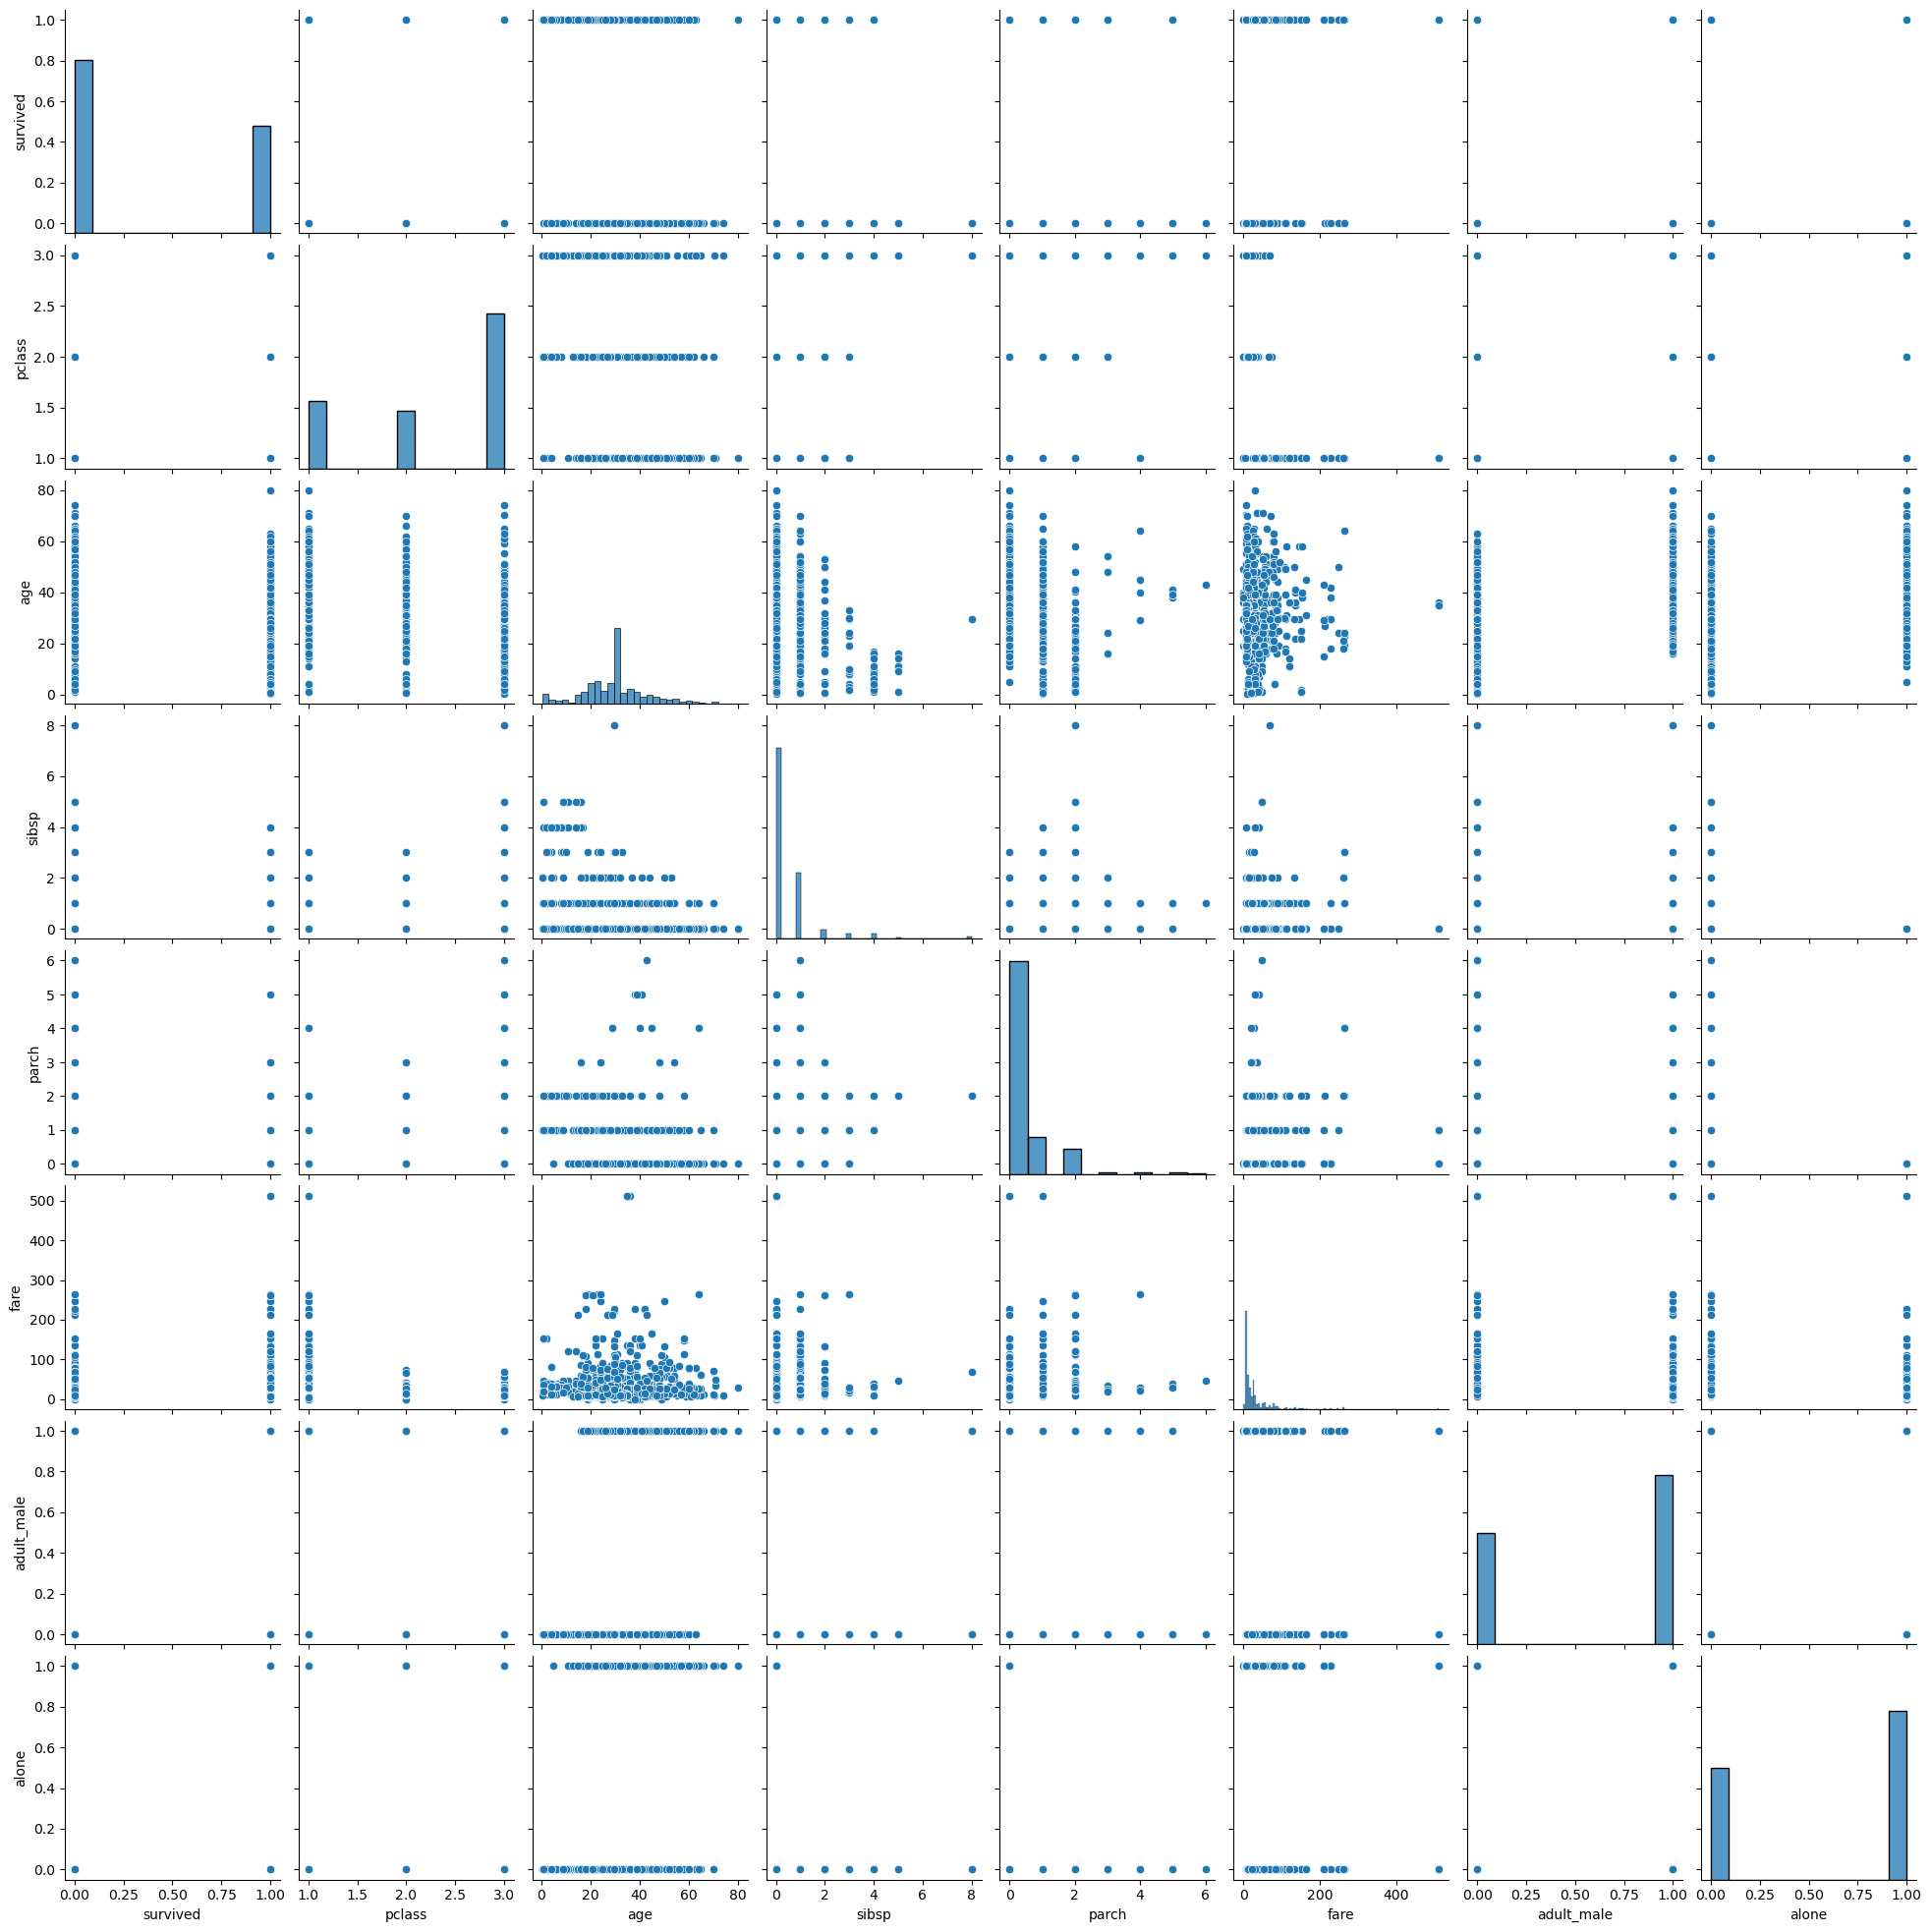

In [173]:
plt.figure(figsize=(8,8))
sns.pairplot(df)

# heatmap

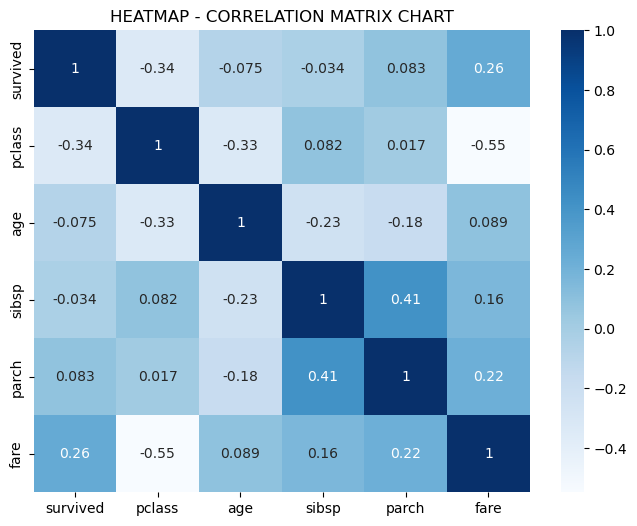

In [170]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True,cmap="Blues")
plt.title("HEATMAP - CORRELATION MATRIX CHART")
plt.show()

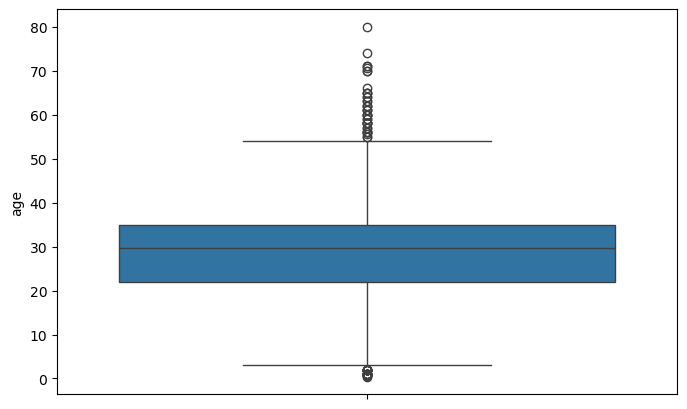

In [166]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(df['age'])
plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


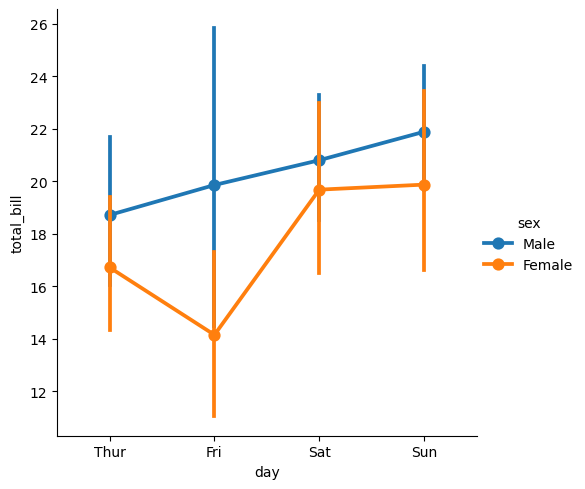

In [23]:
df=sns.load_dataset("tips")
print(df.head(5))
sns.catplot(x=df["day"],y=df["total_bill"],hue=df["sex"],kind='point')
plt.show()